In [1]:
import pixiedust
#!pip install --upgrade ~/Development/repos/quantutils
#!pip install --upgrade ~/Development/repos/tradeframework


# import utilities
from quantutils.api.datasource import MarketDataStore
from quantutils.api.auth import CredentialsStore
import quantutils.dataset.pipeline as ppl

#import tradeframework
from tradeframework.api import Derivative, Optimizer, Model, TradeEnvironment, TradeEngine, Asset
from tradeframework.environments import SandboxEnvironment, ZiplineEnvironment
from tradeframework.models import PreOpenMomentum
import tradeframework.operations.trader as trader
import tradeframework.operations.utils as utils

# Development
import pandas as pd
import numpy as np


%matplotlib inline


Pixiedust database opened successfully


/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [6]:
## Get Market Data

mds = MarketDataStore(remote=True, location="http://pricestore.192.168.1.203.nip.io")

marketData = mds.aggregate("2013-01-01","2018-07-11",["WallSt-hourly","D%26J-IND"],"H")
ts = ppl.removeNaNs(marketData)
ts.index = ts.index.tz_localize('UTC')
ts.index = ts.index.tz_convert("US/Eastern")

In [7]:
ts

Open      High       Low     Close
2013-01-02 10:00:00-05:00  13366.48  13374.82  13338.68  13345.45
2013-01-02 11:00:00-05:00  13345.60  13353.75  13321.64  13321.77
2013-01-02 12:00:00-05:00  13321.76  13339.25  13320.28  13326.66
2013-01-02 13:00:00-05:00  13326.64  13336.06  13322.51  13329.19
2013-01-02 14:00:00-05:00  13329.09  13339.82  13318.19  13331.80
2013-01-02 15:00:00-05:00  13331.83  13395.20  13331.83  13395.20
2013-01-03 10:00:00-05:00  13381.66  13395.66  13376.42  13391.14
2013-01-03 11:00:00-05:00  13391.18  13413.73  13391.16  13408.19
2013-01-03 12:00:00-05:00  13408.16  13420.65  13402.45  13419.40
2013-01-03 13:00:00-05:00  13419.37  13430.13  13411.07  13427.51
2013-01-03 14:00:00-05:00  13427.51  13427.55  13384.12  13406.51
2013-01-03 15:00:00-05:00  13406.38  13406.38  13359.65  13377.48
2013-01-04 10:00:00-05:00  13407.46  13411.91  13377.22  13387.45
2013-01-04 11:00:00-05:00  13387.37  13420.86  13386.80  13408.33
2013-01-04 12:00:00-05:00  13408.20  13415.80  13403.52  13405.06
2013-01-04 13:00:00-05:00  13405.08  13421.85  13403.28  13415.01
2013-01-04 14:00:00-05:00  13415.03  13420.09  13409.60  13419.02
2013-01-04 15:00:00-05:00  13419.10  13445.47  13419.10  13430.18
2013-01-07 10:00:00-05:00  13368.06  13394.73  13367.45  13387.40
2013-01-07 11:00:00-05:00  13387.36  13390.38  13355.73  13356.99
2013-01-07 12:00:00-05:00  13357.02  13360.42  13346.56  13353.74
2013-01-07 13:00:00-05:00  13353.78  13365.58  13351.39  13361.63
2013-01-07 14:00:00-05:00  13361.62  13381.71  13359.08  13381.24
2013-01-07 15:00:00-05:00  13381.30  13398.84  13378.09  13382.69
2013-01-08 10:00:00-05:00  13339.06  13349.76  13317.65  13320.66
2013-01-08 11:00:00-05:00  13320.64  13324.15  13299.46  13317.35
2013-01-08 12:00:00-05:00  13317.28  13321.55  13293.77  13296.45
2013-01-08 13:00:00-05:00  13296.55  13318.02  13296.55  13316.23
2013-01-08 14:00:00-05:00  13316.21  13325.26  13306.44  13311.44
2013-01-08 15:00:00-05:00  13311.48  13337.96  13311.48  13325.56
...                             ...       ...       ...       ...
2018-07-09 14:00:00-04:00  24761.50  24796.00  24750.50  24788.50
2018-07-09 15:00:00-04:00  24789.00  24796.50  24764.50  24778.00
2018-07-09 16:00:00-04:00  24776.50  24800.50  24774.00  24793.50
2018-07-09 17:00:00-04:00  24793.00  24793.00  24789.50  24789.50
2018-07-09 18:00:00-04:00  24792.50  24831.50  24776.00  24830.00
2018-07-09 19:00:00-04:00  24827.50  24846.00  24824.00  24837.00
2018-07-09 20:00:00-04:00  24837.50  24894.50  24834.00  24884.50
2018-07-09 21:00:00-04:00  24884.00  24886.00  24845.00  24850.00
2018-07-09 22:00:00-04:00  24850.50  24869.50  24845.00  24854.00
2018-07-09 23:00:00-04:00  24853.50  24870.00  24849.00  24854.50
2018-07-10 00:00:00-04:00  24855.00  24861.00  24851.00  24857.00
2018-07-10 01:00:00-04:00  24857.00  24866.00  24827.50  24829.50
2018-07-10 02:00:00-04:00  24827.00  24838.50  24809.00  24835.00
2018-07-10 03:00:00-04:00  24835.50  24843.50  24799.50  24808.00
2018-07-10 04:00:00-04:00  24808.50  24825.00  24803.50  24811.50
2018-07-10 05:00:00-04:00  24812.50  24847.00  24808.50  24837.50
2018-07-10 06:00:00-04:00  24839.00  24851.50  24823.50  24823.50
2018-07-10 07:00:00-04:00  24823.00  24858.50  24821.50  24841.50
2018-07-10 08:00:00-04:00  24840.50  24851.00  24809.50  24847.00
2018-07-10 09:00:00-04:00  24847.50  24900.50  24839.50  24899.50
2018-07-10 10:00:00-04:00  24898.00  24945.50  24877.50  24932.50
2018-07-10 11:00:00-04:00  24933.50  24940.00  24882.00  24935.50
2018-07-10 12:00:00-04:00  24935.00  24936.50  24892.50  24901.50
2018-07-10 13:00:00-04:00  24902.00  24916.00  24859.50  24886.50
2018-07-10 14:00:00-04:00  24887.50  24919.50  24885.00  24914.50
2018-07-10 15:00:00-04:00  24915.00  24931.00  24900.50  24916.50
2018-07-10 16:00:00-04:00  24914.50  24941.50  24754.50  24809.50
2018-07-10 18:00:00-04:00  24759.00  24808.50  24701.50  24709.50
2018-07-10 19:00:00-04:00  24710.00  24748.50  24694.00  24711.50
2018-

In [3]:
import quantutils.core.timeseries as tsUtils
import tradeframework.operations.trader as trader

class TwoStdDev(Model):
    def __init__(self, name, env, start=None, end=None):
        Model.__init__(self, name, env)
        self.start = start
        self.end = end
        self.env
        return
    
    def getSignals(self, context, assetInfo):
        
        signals = pd.DataFrame(np.zeros((len(assetInfo.values), 2)), index=assetInfo.values.index, columns=["bar","gap"])
        
        ret =  np.log((trader.getPeriodReturns(assetInfo.returns) + 1))
        
        ma = pd.DataFrame(tsUtils.MA(ret, 20, 10), ret.index)
        std = pd.DataFrame(tsUtils.MStd(ret, 20, 10), ret.index)
        b1 = ma + 2*std
        b2 = ma - 2*std
        
        signals["bar"][(ret > b1[0]) | (ret<b2[0])] = np.sign(ret[(ret > b1[0]) | (ret<b2[0])])
        signals = signals.shift(1)
        signals.iloc[0] = 0
        
        return signals

In [4]:
#%%pixie_debugger
bEnv = SandboxEnvironment("TradeFair")
b = bEnv.createPortfolio("Baseline", optimizer=bEnv.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
b.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold", args=("15:00", "16:00", True)))
#p.addModel(MeanReversion("MR-BL", bEnv, "12:00", "13:00" ))
#p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold"))
baseline = bEnv.append(Asset("DOW", ts)).assets[0]

In [5]:
env = SandboxEnvironment("TradeFair")

#opt = env.createOptimizer("KellyOptimizer", "KellyOpt", opts={"window":20*24, "weight":.05})
opt = env.createOptimizer("EqualWeightsOptimizer", "EqualWeights")#, opts={"weight":4.0})
p = env.createPortfolio("MyPortfolio", optimizer=opt)

#p.addModel(RetraceDailyMove("RDM1", env, "12:00", "13:00" ))
#p.addModel(RetraceDailyMove("RDM2", env, "13:00", "14:00" ))
#p.addModel(RetraceDailyMove("RDM3", env, "14:00", "15:00" ))
#p.addModel(RetraceDailyMove("RDM4", env, "15:00", "16:00" ))

#p.addModel(env.createModel( "MeanReversion", "MR1", args=("15:00", "16:00" )))
#p.addModel(MeanReversion("MR2", env, "10:00", "11:00" ))
#p.addModel(MeanReversion("MR3", env, "11:00", "12:00" ))
#p.addModel(MeanReversion("MR4", env, "12:00", "13:00" ))
#p.addModel(MeanReversion("MR5", env, "13:00", "14:00" ))
#p.addModel(MeanReversion("MR6", env, "14:00", "15:00" ))
#p.addModel(env.createModel("MeanReversion", "MR7", args=("15:00", "16:00", True)))
p.addModel(env.createModel("TrendFollowing", "TF7", args=("15:00", "16:00", True)))
#p.addModel(TwoStdDev("SD", env))

#p.addModel(env.createModel( "PreOpenMomentum", "D1-PreOpenMomentum" ))

#p.addModel(env.createModel( "BuyAndHold", "D2-BuyAndHold" ))

#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold7", args=("09:00", "10:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold6", args=("10:00", "11:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold5", args=("11:00", "12:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold4", args=("12:00", "13:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold3", args=("13:00", "14:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold2", args=("14:00", "15:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold1", args=("15:00", "16:00")))

#p.addModel(env.createModel( "SellAndHold", "D4-SellAndHold", args=("15:00", "16:00")))
threshold = 0
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBootstrap_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '4892e256e17f4fad775119304ee7e6d1', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBootstrap_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '4892e256e17f4fad775119304ee7e6d1', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBoosting_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '83c0ff9eeb24c87dbb0af766ab59ef75', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBoosting_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '83c0ff9eeb24c87dbb0af766ab59ef75', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', 'f2efe64bbc39ad0880337120f32ca12b', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', 'f2efe64bbc39ad0880337120f32ca12b', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '078df5a1afbaa2290ee93b4a562e3898', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '078df5a1afbaa2290ee93b4a562e3898', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_SwitchedOrder_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', 'bdfa91432d64e63fc528869163a8b3fb', threshold, True)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_SwitchedOrder_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', 'bdfa91432d64e63fc528869163a8b3fb', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_LongRun_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '9a23dcf38b04cccf8a28381ea013dc7f', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_LongRun_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '9a23dcf38b04cccf8a28381ea013dc7f', threshold, True)))

#TODO Aggregate multiple training runs as well as datasets
agg = [{
    'training_run_id': 'bdfa91432d64e63fc528869163a8b3fb',
    'datasets': ['4234f0f1b6fcc17f6458696a6cdf5101', '3231bbe5eb2ab84eb54c9b64a8dcea55']
}]

#p.addModel(env.createModel( "MIAggregateModel", "ML-OneStepAhead_Agg", args=(CredentialsStore(), agg, "vote_unanimous_all", threshold)))

# Feed data into the portfolio
#for index in range(0, len(ts)):
#env.handleData(0, ts[:index+1])
env.append(Asset("DOW", ts)) 
print("Done")

Done


In [6]:
ts[:12]

Open      High       Low     Close
Date_Time                                                        
2013-01-02 10:00:00-05:00  13366.48  13374.82  13338.68  13345.45
2013-01-02 11:00:00-05:00  13345.60  13353.75  13321.64  13321.77
2013-01-02 12:00:00-05:00  13321.76  13339.25  13320.28  13326.66
2013-01-02 13:00:00-05:00  13326.64  13336.06  13322.51  13329.19
2013-01-02 14:00:00-05:00  13329.09  13339.82  13318.19  13331.80
2013-01-02 15:00:00-05:00  13331.83  13395.20  13331.83  13395.20
2013-01-03 10:00:00-05:00  13381.66  13395.66  13376.42  13391.14
2013-01-03 11:00:00-05:00  13391.18  13413.73  13391.16  13408.19
2013-01-03 12:00:00-05:00  13408.16  13420.65  13402.45  13419.40
2013-01-03 13:00:00-05:00  13419.37  13430.13  13411.07  13427.51
2013-01-03 14:00:00-05:00  13427.51  13427.55  13384.12  13406.51
2013-01-03 15:00:00-05:00  13406.38  13406.38  13359.65  13377.48

In [7]:
env.append(Asset("DOW", ts[:11])) 

In [7]:
trader.getCurrentSignal(p, 10000)

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9960
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77
Signal: SELL
Amount: $0.64



MyPortfolio                DOW                       \
                              Capital              Price           Allocation   
                                 Open     Close     Open     Close        bar   
Date_Time                                                                       
2013-07-11 15:00:00-04:00    0.994278  0.995975  15448.4  15474.77   0.000064   

                                                    
                                   Trade            
                           gap       bar       gap  
Date_Time                                           
2013-07-11 15:00:00-04:00  0.0  0.000064 -0.000064

In [9]:
x = ts[11:12].copy()
#x["Close"] = np.nan
#x["High"] = np.nan
#x["Low"] = np.nan

possibles = []

for i in range(0,30):
    ohlc = [[x["Open"].values[0] + i, np.nan, np.nan, np.nan]]
    index = x.index
    possibles.append(utils.createAssetFromOHLC(index, ohlc, "DOW"))
    
trader.predictSignal(env, possibles, 10000)

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9960
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77
Signal: SELL
Amount: $0.64

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9960
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77
Signal: SELL
Amount: $0.64

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9961
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77
Signal: SELL
Amount: $0.64

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9962
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77
Signal: SELL
Amount: $0.64

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9963
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77
Signal: SELL
Amount: $0.64

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9963
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77
Signal: SELL
Amount: $0.64

Time: 2013-07-11T15:00:00-04:00
Portfolio Value: $0.9964
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $15474.77

In [11]:
ohlc = [[13407.46, 13411.91, 13377.22, 13387.45]]
index = pd.DatetimeIndex(['2013-01-04 15:00:00'], tz='US/Eastern') # TODO: Provide UK timezone

trader.predictSignal(env, utils.createAssetFromOHLC(index, ohlc, "DOW"), 10000)

Time: 2013-01-04T15:00:00-05:00
Portfolio Value: $1.0063
Capital: $10000.00
Target: CLOSE
Market: DOW
Price: $13387.45
Signal: BUY
Amount: $0.75



In [10]:
trader.getTradingInfo(p,10000, unitAllocations=False)

MyPortfolio                     DOW            \
                                Capital                   Price             
                                   Open         Close      Open     Close   
Date_Time                                                                   
2013-01-02 15:00:00-05:00  10000.000000  10047.532859  13331.83  13395.20   
2013-01-03 15:00:00-05:00  10047.532859  10069.192226  13406.38  13377.48   
2013-01-04 15:00:00-05:00  10069.192226  10077.506245  13419.10  13430.18   
2013-01-07 15:00:00-05:00  10077.506245  10078.553059  13381.30  13382.69   
2013-01-08 15:00:00-05:00  10078.553059  10067.892634  13311.48  13325.56   
2013-01-09 15:00:00-05:00  10067.892634  10048.245526  13364.34  13390.42   
2013-01-10 15:00:00-05:00  10048.245526  10054.749351  13456.73  13465.44   
2013-01-11 15:00:00-05:00  10054.749351  10057.815431  13478.13  13482.24   
2013-01-14 15:00:00-05:00  10057.815431  10053.877297  13510.42  13505.13   
2013-01-15 15:00:00-05:00  10053.877297  10067.993231  13518.24  13537.22   
2013-01-16 15:00:00-05:00  10067.993231  10063.828214  13512.57  13506.98   
2013-01-17 15:00:00-05:00  10063.828214  10075.117822  13620.96  13605.68   
2013-01-18 15:00:00-05:00  10075.117822  10098.765466  13608.09  13640.03   
2013-01-22 15:00:00-05:00  10098.765466  10102.443705  13700.26  13705.25   
2013-01-23 15:00:00-05:00  10102.443705  10092.796070  13790.86  13777.69   
2013-01-24 15:00:00-05:00  10092.796070  10095.920698  13824.74  13829.02   
2013-01-25 15:00:00-05:00  10095.920698  10088.309625  13874.96  13885.42   
2013-01-28 15:00:00-05:00  10088.309625  10075.778068  13902.91  13885.64   
2013-01-29 15:00:00-05:00  10075.778068  10068.807576  13948.98  13958.63   
2013-01-30 15:00:00-05:00  10068.807576  10086.985581  13930.60  13905.45   
2013-01-31 15:00:00-05:00  10086.985581  10104.442086  13896.94  13872.89   
2013-02-01 15:00:00-05:00  10104.442086  10100.753883  13999.69  14004.80   
2013-02-04 15:00:00-05:00  10100.753883  10071.841824  13915.06  13875.23   
2013-02-05 15:00:00-05:00  10071.841824  10050.006929  14004.24  13973.88   
2013-02-06 15:00:00-05:00  10050.006929  10064.214632  13963.35  13983.09   
2013-02-07 15:00:00-05:00  10064.214632  10062.150123  13942.13  13939.27   
2013-02-08 15:00:00-05:00  10062.150123  10062.315616  13984.29  13984.06   
2013-02-11 15:00:00-05:00  10062.315616  10052.266759  13958.67  13972.61   
2013-02-12 15:00:00-05:00  10052.266759  10060.641928  14030.88  14019.19   
2013-02-13 15:00:00-05:00  10060.641928  10040.285963  13952.27  13980.50   
...                                 ...           ...       ...       ...   
2013-05-28 15:00:00-04:00   9882.888629   9885.267509  15412.93  15416.64   
2013-05-29 15:00:00-04:00   9885.267509   9889.294539  15317.51  15311.27   
2013-05-30 15:00:00-04:00   9889.294539   9849.600043  15391.57  15329.79   
2013-05-31 15:00:00-04:00   9849.600043   9910.931762  15238.91  15144.02   
2013-06-03 15:00:00-04:00   9910.931762   9947.709875  15193.23  15249.61   
2013-06-04 15:00:00-04:00   9947.709875   9972.061811  15143.01  15180.08   
2013-06-05 15:00:00-04:00   9972.061811   9996.124530  14993.70  14957.52   
2013-06-06 15:00:00-04:00   9996.124530  10034.864878  14973.41  15031.44   
2013-06-07 15:00:00-04:00  10034.864878  10059.948213  15210.32  15248.34   
2013-06-10 15:00:00-04:00  10059.948213  10036.930829  15262.09  15227.17   
2013-06-11 15:00:00-04:00  10036.930829   9996.308435  15182.99  15121.54   
2013-06-12 15:00:00-04:00   9996.308435  10004.660861  15008.06  14995.52   
2013-06-13 15:00:00-04:00  10004.660861  10042.316314  15123.05  15179.97   
2013-06-14 15:00:00-04:00  10042.316314  10035.201764  15060.90  15071.57   
2013-06-17 15:00:00-04:00  10035.201764   9999.390877  15126.69  15180.67   
2013-06-18 15:00:00-04:00   9999.390877   9987.418682  15334.60  15316.24   
2013-06-19 15:00:00-04:00   9987.418682  10003.336962  15152.15  15128.00   
2013-06-20 15:00:00-04:0

In [14]:
trader.getTradingInfo(p,10000)

MyPortfolio                     DOW            \
                                Capital                   Price             
                                   Open         Close      Open     Close   
Date_Time                                                                   
2013-01-02 15:00:00-05:00  10000.000000  10047.532859  13331.83  13395.20   
2013-01-03 15:00:00-05:00  10047.532859  10069.192226  13406.38  13377.48   
2013-01-04 15:00:00-05:00  10069.192226  10077.506245  13419.10  13430.18   
2013-01-07 15:00:00-05:00  10077.506245  10078.553059  13381.30  13382.69   
2013-01-08 15:00:00-05:00  10078.553059  10067.892634  13311.48  13325.56   
2013-01-09 15:00:00-05:00  10067.892634  10048.245526  13364.34  13390.42   
2013-01-10 15:00:00-05:00  10048.245526  10054.749351  13456.73  13465.44   
2013-01-11 15:00:00-05:00  10054.749351  10057.815431  13478.13  13482.24   
2013-01-14 15:00:00-05:00  10057.815431  10053.877297  13510.42  13505.13   
2013-01-15 15:00:00-05:00  10053.877297  10067.993231  13518.24  13537.22   
2013-01-16 15:00:00-05:00  10067.993231  10063.828214  13512.57  13506.98   
2013-01-17 15:00:00-05:00  10063.828214  10075.117822  13620.96  13605.68   
2013-01-18 15:00:00-05:00  10075.117822  10098.765466  13608.09  13640.03   
2013-01-22 15:00:00-05:00  10098.765466  10102.443705  13700.26  13705.25   
2013-01-23 15:00:00-05:00  10102.443705  10092.796070  13790.86  13777.69   
2013-01-24 15:00:00-05:00  10092.796070  10095.920698  13824.74  13829.02   
2013-01-25 15:00:00-05:00  10095.920698  10088.309625  13874.96  13885.42   
2013-01-28 15:00:00-05:00  10088.309625  10075.778068  13902.91  13885.64   
2013-01-29 15:00:00-05:00  10075.778068  10068.807576  13948.98  13958.63   
2013-01-30 15:00:00-05:00  10068.807576  10086.985581  13930.60  13905.45   
2013-01-31 15:00:00-05:00  10086.985581  10104.442086  13896.94  13872.89   
2013-02-01 15:00:00-05:00  10104.442086  10100.753883  13999.69  14004.80   
2013-02-04 15:00:00-05:00  10100.753883  10071.841824  13915.06  13875.23   
2013-02-05 15:00:00-05:00  10071.841824  10050.006929  14004.24  13973.88   
2013-02-06 15:00:00-05:00  10050.006929  10064.214632  13963.35  13983.09   
2013-02-07 15:00:00-05:00  10064.214632  10062.150123  13942.13  13939.27   
2013-02-08 15:00:00-05:00  10062.150123  10062.315616  13984.29  13984.06   
2013-02-11 15:00:00-05:00  10062.315616  10052.266759  13958.67  13972.61   
2013-02-12 15:00:00-05:00  10052.266759  10060.641928  14030.88  14019.19   
2013-02-13 15:00:00-05:00  10060.641928  10040.285963  13952.27  13980.50   
...                                 ...           ...       ...       ...   
2013-05-28 15:00:00-04:00   9882.888629   9885.267509  15412.93  15416.64   
2013-05-29 15:00:00-04:00   9885.267509   9889.294539  15317.51  15311.27   
2013-05-30 15:00:00-04:00   9889.294539   9849.600043  15391.57  15329.79   
2013-05-31 15:00:00-04:00   9849.600043   9910.931762  15238.91  15144.02   
2013-06-03 15:00:00-04:00   9910.931762   9947.709875  15193.23  15249.61   
2013-06-04 15:00:00-04:00   9947.709875   9972.061811  15143.01  15180.08   
2013-06-05 15:00:00-04:00   9972.061811   9996.124530  14993.70  14957.52   
2013-06-06 15:00:00-04:00   9996.124530  10034.864878  14973.41  15031.44   
2013-06-07 15:00:00-04:00  10034.864878  10059.948213  15210.32  15248.34   
2013-06-10 15:00:00-04:00  10059.948213  10036.930829  15262.09  15227.17   
2013-06-11 15:00:00-04:00  10036.930829   9996.308435  15182.99  15121.54   
2013-06-12 15:00:00-04:00   9996.308435  10004.660861  15008.06  14995.52   
2013-06-13 15:00:00-04:00  10004.660861  10042.316314  15123.05  15179.97   
2013-06-14 15:00:00-04:00  10042.316314  10035.201764  15060.90  15071.57   
2013-06-17 15:00:00-04:00  10035.201764   9999.390877  15126.69  15180.67   
2013-06-18 15:00:00-04:00   9999.390877   9987.418682  15334.60  15316.24   
2013-06-19 15:00:00-04:00   9987.418682  10003.336962  15152.15  15128.00   
2013-06-20 15:00:00-04:0

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5dc6fed320>)

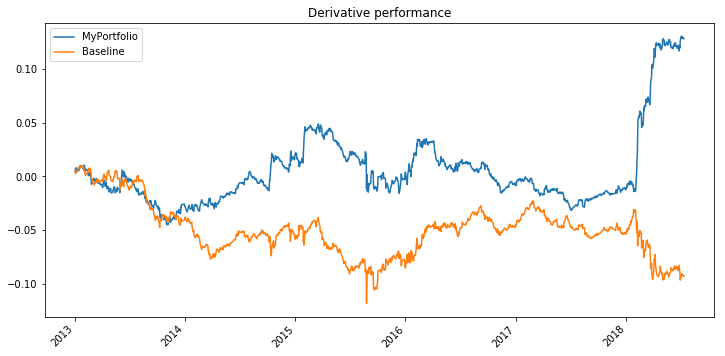

In [5]:
# MODEL: p.addModel(env.createModel("TrendFollowing", "TF7", args=("15:00", "16:00", True)))
#
# TODO - Notice how the simple trend following model works well when the market volatility changes in 2018. A 
# property of the market "stretching" so that the medium term (in this case bi-hourly) trends hit their sweet spot. 
# Earlier when volatility is lower and market is "compacted", the target trend term is longer (maybe 4-hourly). This 
# could be achieved with a MA with a dynamic window, or by dynamically modifying the time sample sizes. 

# TODO - The visualisation of the basline is misleading and does not show the cause of the performance (in this case the
# previous hours prices and the current hours prices, in a sequentional form). Perhaps we need to show period returns
# rather than daily returns (which is what getPeriodReturns provides)

trader.plot(p, baseline, includeComponents=False, includePrimary=True, log=True)

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a4effa0f0>)

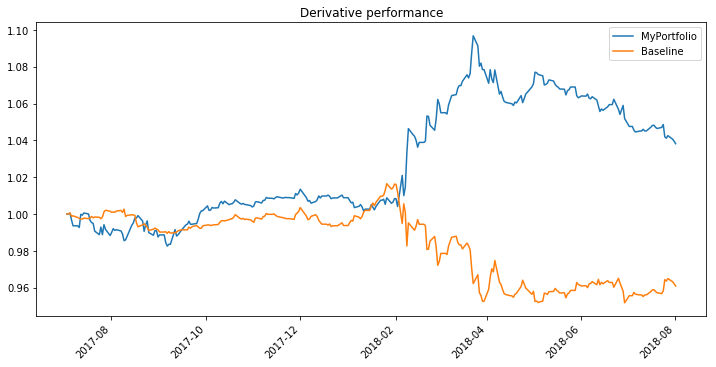

In [11]:
# TODO - EVEN MORE SUSPICIOUS PLOT - Why are Multiple Equally Weight MI signals generating the exact inverse of the baseline
# Sell signal until training period over (2000ish training set)?

import tradeframework.utils.trader as trader
#tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.plot(p, baseline, includeComponents=False, includePrimary=True, log=False)

In [10]:
## import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
#fig, ax = trader.plot(dInfo.assets[0], includeComponents=False, includePrimary=False, log=False)

# Add Moving Average
import quantutils.core.timeseries as tsUtils
period = 20
offset = 10
ret =  np.log((trader.getPeriodReturns(baseline.assets[0].returns) + 1))

ma2 = pd.DataFrame(tsUtils.MA(np.cumsum(ret), period, offset), np.cumsum(ret).index)

ma1 = pd.DataFrame(tsUtils.MA(ret, period, offset), ret.index)
ma1.iloc[int(np.ceil(period/2+offset)-1)] =  np.cumsum(ma2).iloc[int(np.ceil(period/2+offset)-1)]

ma3 = pd.DataFrame(EMA(ret, period, offset), ret.index)
ma3.iloc[int(np.ceil(period/2+offset)-1)] = np.cumsum(ma2).iloc[int(np.ceil(period/2+offset)-1)]

# Bollinger Bands
b1 = ma1 + 2*pd.DataFrame(MStd(ret, period, offset), ret.index)
b2 = ma1 - 2*pd.DataFrame(MStd(ret, period, offset), ret.index)

#ax.plot(np.cumsum(ma1), label="MA=20")
#ax.plot(np.cumsum(ma2), 'ro', label="MA=20")
#ax.plot(np.cumsum(ma3), label="EMA=20")
#ax.plot(np.cumsum(ret),label="Return")
#ax.plot(np.cumsum(b1),label="Upper",color='b')
#ax.plot(np.cumsum(b2),label="Lower",color='b')
ax.plot(ret,label="Return")
ax.plot(ma1, label="MA=20")
ax.plot(b1,label="Upper",color='b')
ax.plot(b2,label="Lower",color='b')

signals = pd.DataFrame(np.zeros((len(baseline.assets[0].returns), 2)), index=baseline.assets[0].returns.index, columns=["bar","gap"])
signals["bar"][(ret > b1[0]) | (ret<b2[0])] = np.negative(np.sign(ret[(ret > b1[0]) | (ret<b2[0])]))
signals = signals.shift(1)
signals.iloc[0] = 0
print(signals[:10])

ax.legend(loc='best')
fig.canvas.draw()

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/quantutils/core/timeseries.py:5: FutureWarning: Series.strides is deprecated and will be removed in a future version
  strides = a.strides + (a.strides[-1],)


NameError: name 'MStd' is not defined

In [171]:
s[(ret > b1[0]) | (ret<b2[0])] = ret[(ret > b1[0]) | (ret<b2[0])]
s[(ret > b1[0]) | (ret<b2[0])][:10]

Date_Time
2016-07-06 11:00:00-04:00   -0.0028989199
2016-07-06 12:00:00-04:00   -0.0027498755
2016-07-07 15:00:00-04:00    0.0038070757
2016-07-08 08:00:00-04:00   -0.0042140577
2016-07-10 22:00:00-04:00    0.0036564117
2016-07-12 04:00:00-04:00    0.0022138113
2016-07-12 11:00:00-04:00    0.0020186596
2016-07-13 09:00:00-04:00    0.0021459527
2016-07-14 02:00:00-04:00   -0.0041677510
2016-07-14 05:00:00-04:00    0.0036714130
Name: bar, dtype: float64

In [173]:
ret[(ret > b1[0]) | (ret<b2[0])][:10]

Date_Time
2016-07-06 11:00:00-04:00   -0.0028989199
2016-07-06 12:00:00-04:00   -0.0027498755
2016-07-07 15:00:00-04:00    0.0038070757
2016-07-08 08:00:00-04:00   -0.0042140577
2016-07-10 22:00:00-04:00    0.0036564117
2016-07-12 04:00:00-04:00    0.0022138113
2016-07-12 11:00:00-04:00    0.0020186596
2016-07-13 09:00:00-04:00    0.0021459527
2016-07-14 02:00:00-04:00   -0.0041677510
2016-07-14 05:00:00-04:00    0.0036714130
dtype: float64

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/quantutils/core/timeseries.py:12: RuntimeWarning: invalid value encountered in multiply
  r = np.empty(len(values)) * np.nan


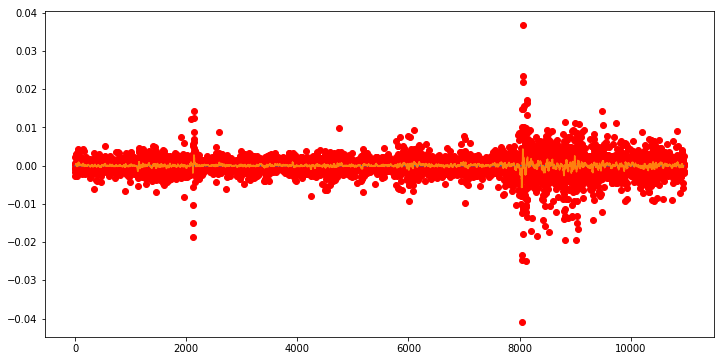

In [48]:
# Returns plot
from matplotlib import pyplot
x = np.diff(tInfo.values[:,0]/10000)
ma = tsUtils.MA(x, 20)
pyplot.plot(x,'ro')
pyplot.plot([0] * len(x))
pyplot.plot(ma)
pyplot.show()

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/quantutils/core/timeseries.py:12: RuntimeWarning: invalid value encountered in multiply
  r = np.empty(len(values)) * np.nan


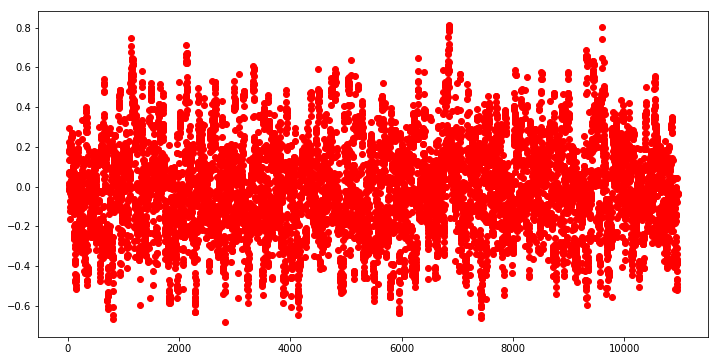

In [49]:
# Moving ACF plot
pyplot.plot(tsUtils.MACF(x, 1, 20, 10), 'ro')
pyplot.show()

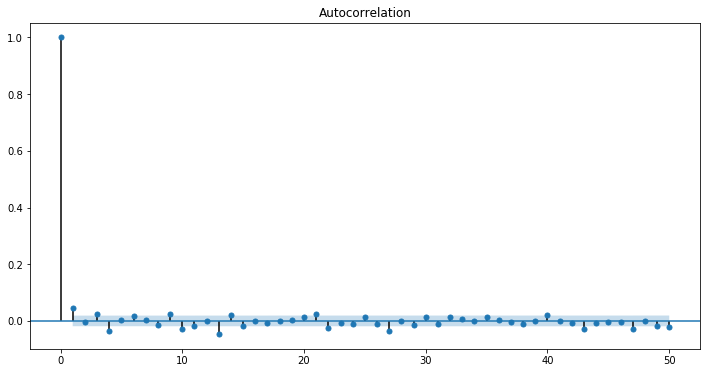

(-21.657623155825704,
 0.0,
 26,
 10932,
 {'1%': -3.430948320175338,
  '5%': -2.861804424408925,
  '10%': -2.566910747983175},
 -109835.06372657401)

In [36]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
plot_acf(x, lags=50)
pyplot.show()
adfuller(x)

In [37]:
import statsmodels.api as sm

# Fit the model
#x = x - x.mean()
mod_data = sm.tsa.MarkovAutoregression(x, k_regimes=2, order=1, trend='nc', switching_variance=True)
res_data = mod_data.fit()

res_data.summary()

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/numpy/linalg/linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/scipy/stats/

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     Open   No. Observations:                10958
Model:             MarkovAutoregression   Log Likelihood                     nan
Date:                  Thu, 16 Aug 2018   AIC                                nan
Time:                          10:56:11   BIC                                nan
Sample:                               0   HQIC                               nan
                                - 10958                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2            nan        nan        nan        nan         nan         nan
ar.L1             nan        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2            nan        nan        nan        nan         nan         nan
ar.L1             nan        nan        nan        nan         nan         nan
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]           nan        nan        nan        nan         nan         nan
p[1->0]           nan        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, figsize=(10,7))

bInfo = bEnv.getTradingInfo(context, baseline, startCapital=1)
ax = axes[0]
ax.plot(bInfo.values[:,0])
ax.set(title='MR Strategy')

ax = axes[1]
ax.plot(tInfo.values[:,0]/10000)
ax.set(title='Market')

ax = axes[2]
ax.plot(x, 'ro')
ax.set(title='Returns')

ax = axes[3]
ax.plot(res_data.filtered_marginal_probabilities[0])
ax.set(title='Smoothed probability of a Momentum regime')

ax = axes[4]
ax.plot(res_data.filtered_marginal_probabilities[1])
ax.set(title='Smoothed probability of a Mean Reversion regime')

#ax = axes[4]
#ax.plot(res_data.filtered_marginal_probabilities[2])
#ax.set(title='Smoothed probability of a High Mean Reversion regime')

fig.tight_layout()

In [7]:
from tradeframework.api import Model

asset1 = Asset("DOW", pd.read_csv('../unittest/data/testData1.csv', parse_dates=True, index_col=0, dayfirst=True))

randomSignals = np.array([1, 1, 0, -1, 0, -1, 1, -1, 0])

class RandomModel(Model):

    def getSignals(self, asset):
        signals = pd.DataFrame(np.array([np.zeros(len(asset.values)), randomSignals[:len(asset.values)]]).T, index=asset.values.index, columns=["bar", "gap"])
        return signals

# Calculate returns via TradeFramework
env = SandboxEnvironment("TradeFair")
p = env.createPortfolio("MyPortfolio", optimizer=env.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
p.addModel(RandomModel("SellAndHold", env))

for i in range(len(asset1.values)):
    x = env.append(Asset("DOW", asset1.values[i:i + 1]))

# Calculate returns manually
mRet = randomSignals[:-1] * np.diff(asset1.values["Close"]) / asset1.values["Close"][:-1]

np.allclose(p.returns.values[:, 1][:-1], mRet.values)

True

In [5]:
p.returns

Open  Close
Date                   
2018-01-01   0.0   -0.2
2018-01-02   0.0    0.1
2018-01-03   0.0    0.0
2018-01-04   0.0   -0.1
2018-01-05   0.0    0.0
2018-01-06   0.0   -0.1
2018-01-07   0.0   -0.2
2018-01-08   0.0   -0.1
2018-01-09   0.0    0.0

In [17]:
p.assets[0].values

Open     Close
Date                          
2018-01-01  1.000000  1.000000
2018-01-02  0.800000  0.800000
2018-01-03  0.880000  0.880000
2018-01-04  0.880000  0.880000
2018-01-05  0.792000  0.792000
2018-01-06  0.792000  0.792000
2018-01-07  0.712800  0.712800
2018-01-08  0.570240  0.570240
2018-01-09  0.513216  0.513216

In [18]:
asset1.values

Open       Close
Date                              
2018-01-01  100.000000  100.000000
2018-01-02   80.000000   80.000000
2018-01-03   88.000000   88.000000
2018-01-04   70.400000   70.400000
2018-01-05   77.440000   77.440000
2018-01-06   61.952000   61.952000
2018-01-07   68.147200   68.147200
2018-01-08   54.517760   54.517760
2018-01-09   59.969536   59.969536

In [3]:
x = [ "poo", "plop"]
a = x.remove("poo")
x


['plop']